In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from string import punctuation
from matplotlib import rcParams
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
messages = pd.read_csv('amazon.csv', sep=';')
messages

,Title,Date,Contributor,Content,Link,Role
0,Be a Part of Ambient Intelligence,Tue Nov 16 11:43:00 UTC 2021,Bob Mars,Ambient intelligence is an environment where e...,https://developer.amazon.com/en-US/blogs/alexa...,NaN
1,Launch of Smart Home Device Health Service,Mon Nov 08 13:02:00 UTC 2021,Sharon Morrow,Do you want to use Smart Home technology to he...,https://developer.amazon.com/en-US/blogs/alexa...,NaN
2,Support for Matter over Thread coming to Echo ...,Wed Nov 03 15:23:00 UTC 2021,Gabe Kassel,"Today, we are excited to announce our support ...",https://developer.amazon.com/en-US/blogs/alexa...,NaN
3,Alexa is Coming to Hospitals and Senior Living...,Mon Oct 25 08:15:00 UTC 2021,Shantanu Kurhekar,"Today, we are excited to announce two new solu...",https://developer.amazon.com/en-US/blogs/alexa...,NaN
4,Introducing the New Alexa Connect Kit SDK for ...,Wed Oct 20 11:11:00 UTC 2021,Nithya Chandrasekaran,"Today, we are excited to announce Alexa Connec...",https://developer.amazon.com/en-US/blogs/alexa...,NaN
...,...,...,...,...,...,...
135,Sonos’ Karen Wickert: Proof That Testing Is Cr...,Wed Mar 07 08:00:00 UTC 2018,Jennifer King,When Karen Wickert started their career as a m...,https://developer.amazon.com/en-US/blogs/alexa...,NaN
136,Introducing the Amazon Alexa Premium Far-Field...,Fri Jan 05 08:00:00 UTC 2018,Gagan Luthra,The Amazon Alexa Voice Service (AVS) makes it ...,https://developer.amazon.com/en-US/blogs/alexa...,NaN
137,Amazon Alexa Mobile Accessories: A New Alexa-E...,Fri Jan 05 08:00:00 UTC 2018,Gagan Luthra,Millions of customers around the world have in...,https://developer.amazon.com/en-US/blogs/alexa...,NaN
138,How to Control Your Cooking Devices with the S...,Thu Jan 04 08:00:00 UTC 2018,Mike Maas,Today we announced updates to the Smart Home S...,https://developer.amazon.com/en-US/blogs/alexa...,NaN


In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
def get_hotwords(text):
    result = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN']
    doc = nlp(text.lower())
    for token in doc:
        
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        
        elif(token.pos_ in pos_tag):
            result.append(token.text)
                
    return result

In [6]:
message_text = str(messages.Title.values)
output = get_hotwords(message_text)
words = [x for x in Counter(output).most_common(30)]

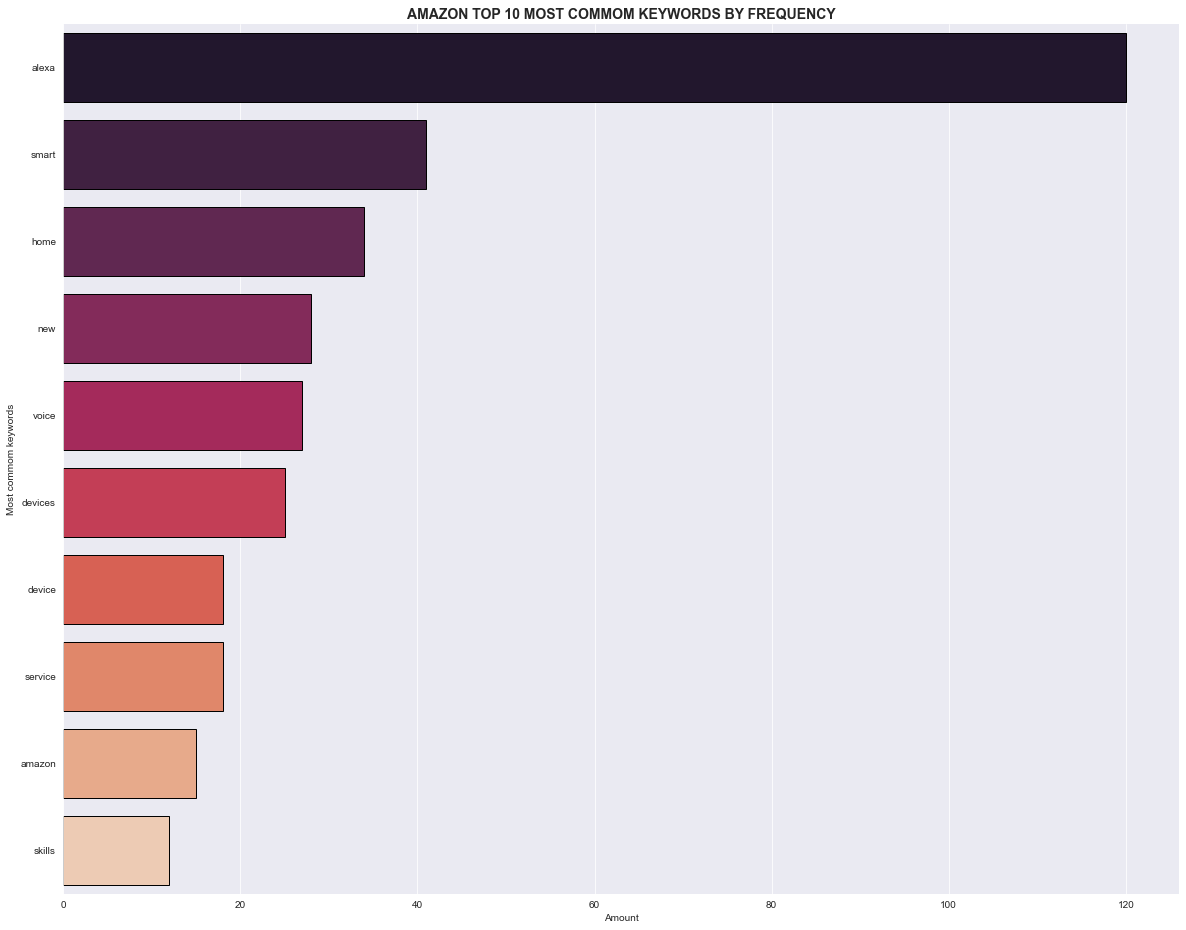

In [7]:
df = pd.DataFrame(words, columns =['Most commom keywords', 'Amount'])
rcParams['figure.figsize'] = 20,16
sns.set_style('darkgrid')
ax = sns.barplot(x='Amount', y='Most commom keywords', data= df[:10], palette='rocket', edgecolor='k')
ax.set_title('AMAZON TOP 10 MOST COMMOM KEYWORDS BY FREQUENCY', fontsize=14, weight='bold')
ax.set_xlabel('Amount')
sns.despine();
plt.savefig('amazon_keywords.png')

In [8]:
doc = list(nlp(message_text).noun_chunks)

In [9]:
import sys

orig_stdout = sys.stdout
f = open(
    'alexa.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Alexa' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [10]:
df = pd.read_table(
    'alexa.txt', 
    header=None,
    encoding= 'cp1252'
)
df.rename(
    columns={
        0: 'Alexa'
    },
    inplace=True, 
    errors='raise'
)
dff = pd.DataFrame(
    data=df.Alexa.value_counts()
).rename(
    columns={'Alexa': 'Frequency'}
).rename_axis(
    'Term'
)
dff.head()

,Frequency
Term,
Alexa,14
Alexa Voice Service,8
Alexa Live,7
Alexa Built,4
'Alexa Gadgets Toolkit,3


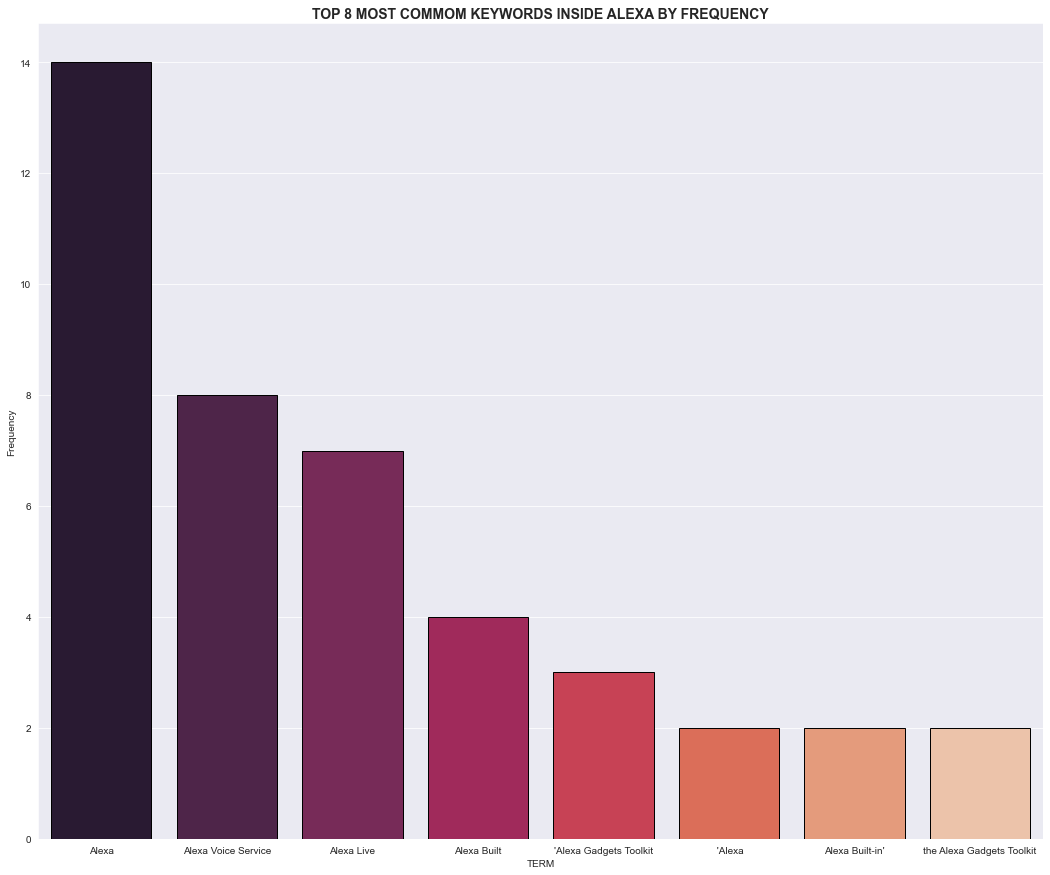

In [11]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff[:8], 
    x=dff.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE ALEXA BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'most_commom_keyword.png'
)

In [12]:
orig_stdout = sys.stdout
f = open(
    'smart.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Smart' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [13]:
df2 = pd.read_table(
    'smart.txt', 
    header=None
)
df2.rename(
    columns={
        0: 'Smart'
    },
    inplace=True, 
    errors='raise'
)
dff2 = pd.DataFrame(
    data=df2.Smart.value_counts()
).rename(
    columns={'Smart': 'Frequency'}
).rename_axis(
    'Term'
)
dff2.head()

,Frequency
Term,
Smart Home,3
'New Alexa Smart Home Developer Tools,2
Smart Toys,2
Smart Home Device Health Service,1
Smart Displays,1


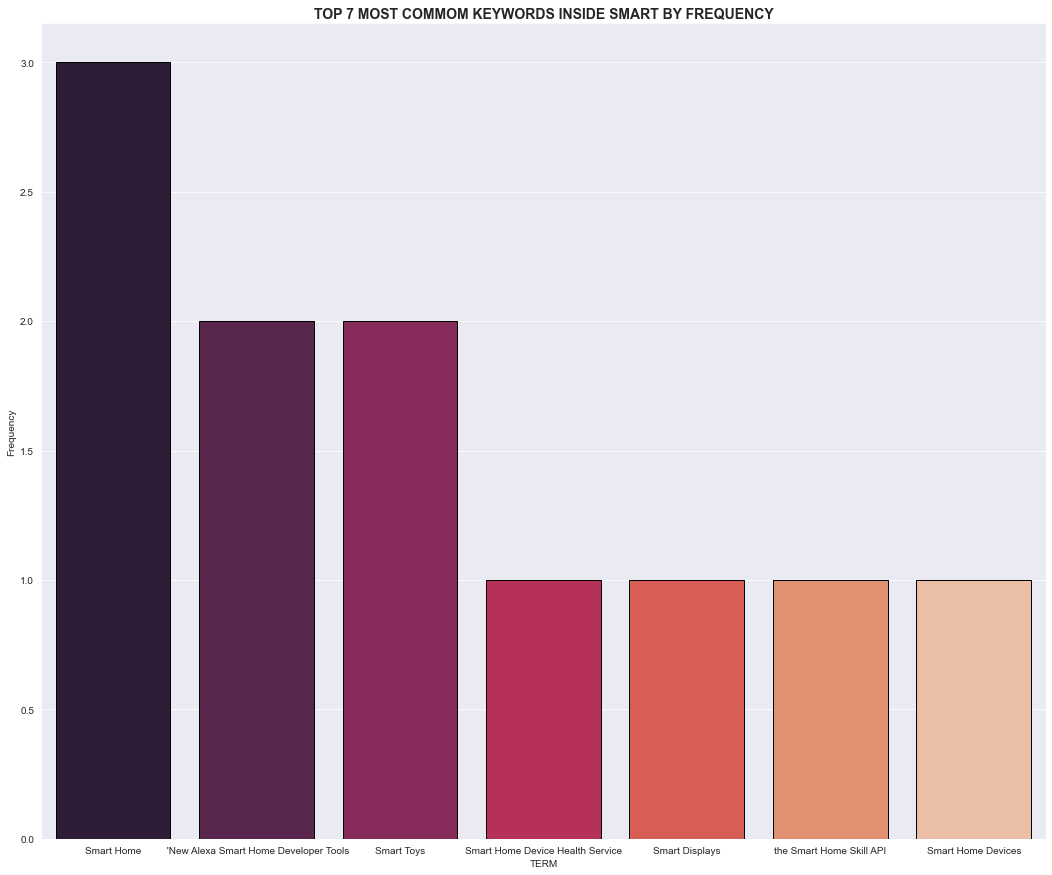

In [14]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff2[:7], 
    x=dff2.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 7 MOST COMMOM KEYWORDS INSIDE SMART BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'second_most_commom_keyword.png'
)

In [15]:
orig_stdout = sys.stdout
f = open(
    'home.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Home' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [16]:
df3 = pd.read_table(
    'home.txt', 
    header=None
)
df3.rename(
    columns={
        0: 'Home'
    },
    inplace=True, 
    errors='raise'
)
dff3 = pd.DataFrame(
    data=df3.Home.value_counts()
).rename(
    columns={'Home': 'Frequency'}
).rename_axis(
    'Term'
)
dff3.head()

,Frequency
Term,
Smart Home,3
Home Automation,2
'New Alexa Smart Home Developer Tools,2
Smart Home Device Health Service,1
New Smart Home Features,1


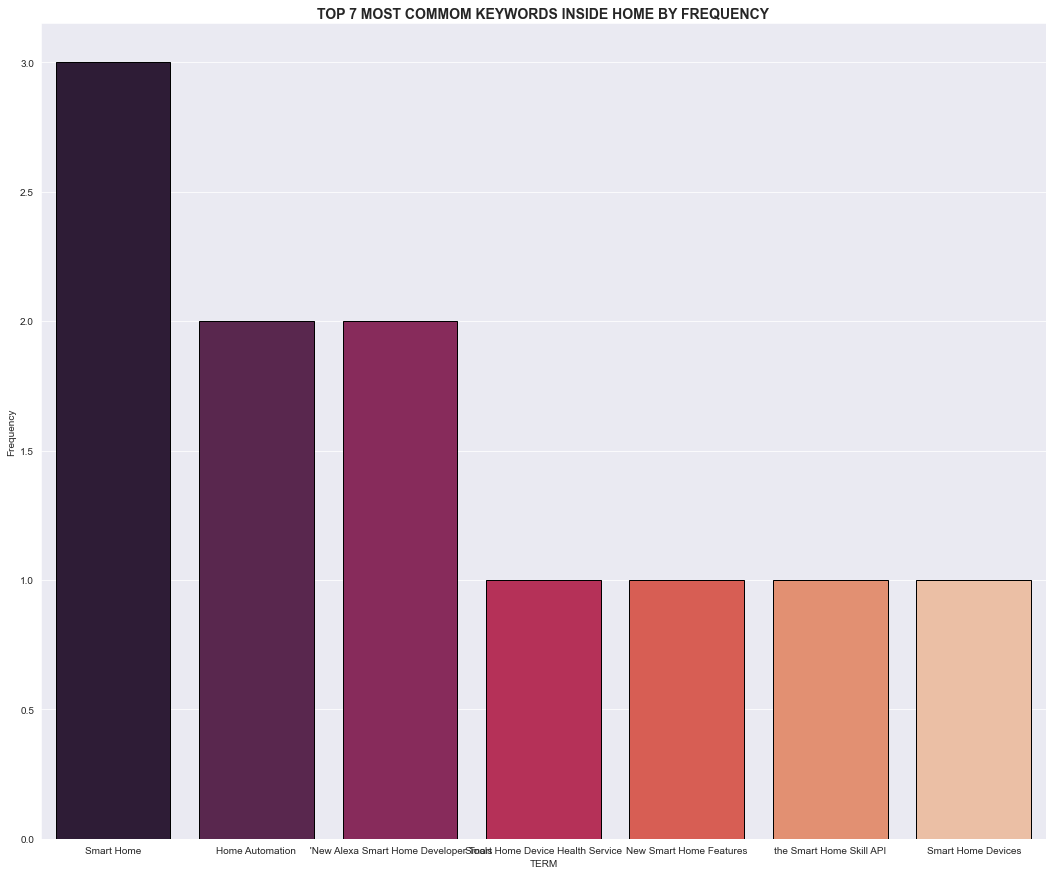

In [17]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff3[:7], 
    x=dff3.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 7 MOST COMMOM KEYWORDS INSIDE HOME BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'third_most_commom_keyword.png'
)

In [18]:
orig_stdout = sys.stdout
f = open(
    'new.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'New' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [20]:
df4 = pd.read_table(
    'new.txt', 
    header=None,
    encoding= 'cp1252'
)
df4.rename(
    columns={
        0: 'New'
    },
    inplace=True, 
    errors='raise'
)
dff4 = pd.DataFrame(
    data=df4.New.value_counts()
).rename(
    columns={'New': 'Frequency'}
).rename_axis(
    'Term'
)
dff4.head()

,Frequency
Term,
New Works,2
'New Alexa Smart Home Developer Tools,2
the New Alexa Connect Kit SDK,1
'New AVS Developer Solutions,1
New Capabilities,1


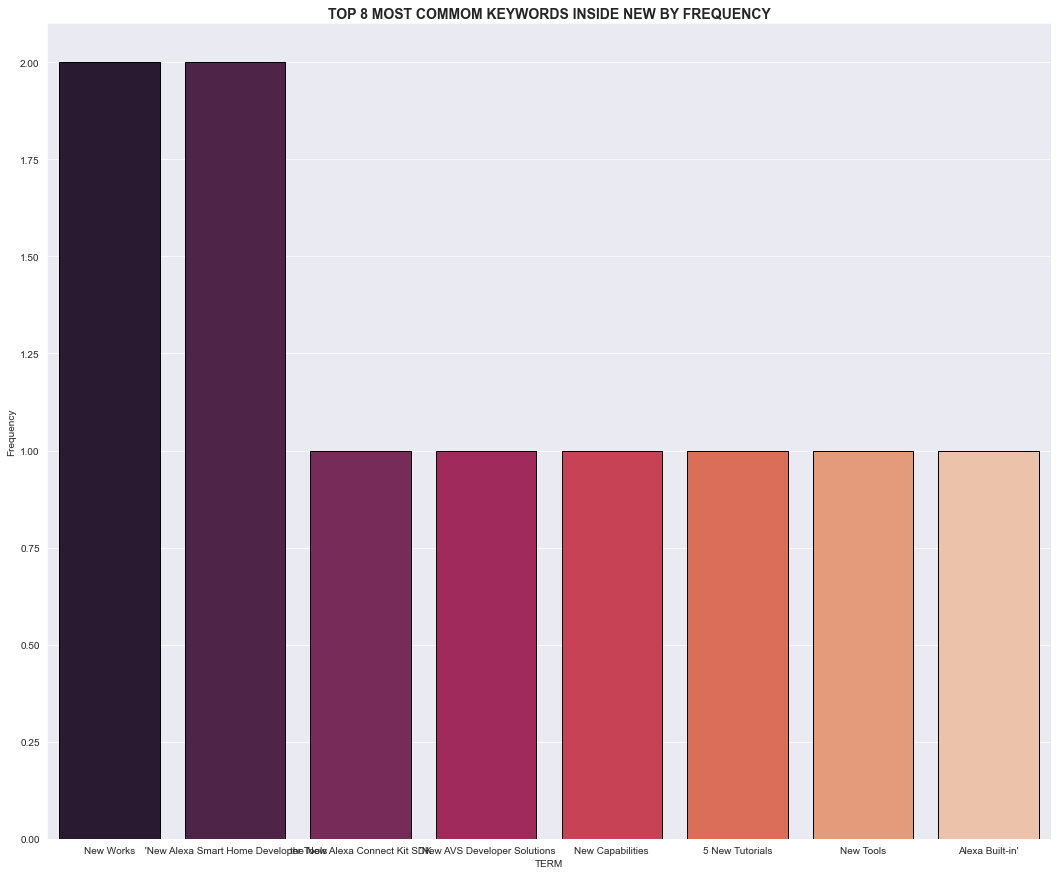

In [21]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff4[:8], 
    x=dff4.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE NEW BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fourth_most_commom_keyword.png'
)

In [27]:
orig_stdout = sys.stdout
f = open(
    'voice.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Voice' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [28]:
df5 = pd.read_table(
    'voice.txt', 
    header=None,
    encoding= 'cp1252'
)
df5.rename(
    columns={
        0: 'Voice'
    },
    inplace=True, 
    errors='raise'
)
dff5 = pd.DataFrame(
    data=df5.Voice.value_counts()
).rename(
    columns={'Voice': 'Frequency'}
).rename_axis(
    'Term'
)
dff5.head()

,Frequency
Term,
Alexa Voice Service,8
Voice,3
Alexa Voice Service Devices,2
Seamless Voice Control,2
'Alexa Voice Service,1


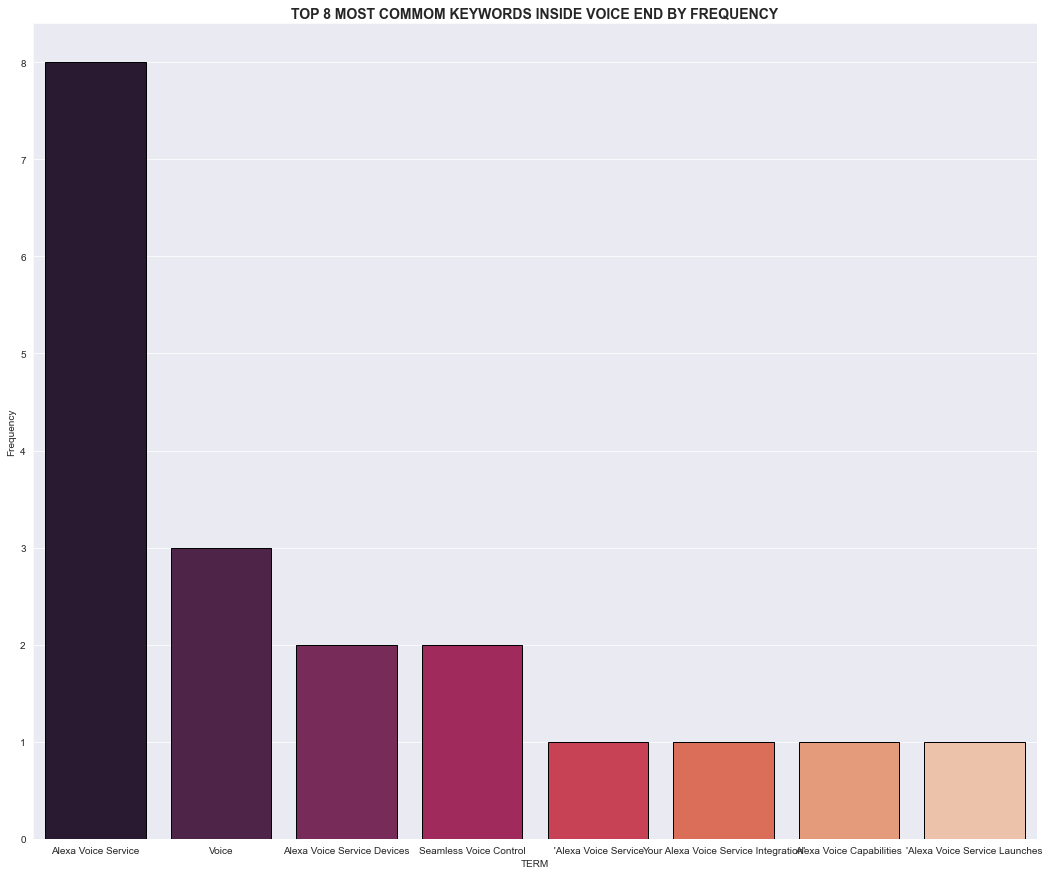

In [29]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff5[:8], 
    x=dff5.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE VOICE END BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'fifth_most_commom_keyword.png'
)

In [31]:
orig_stdout = sys.stdout
f = open(
    'devices.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Devices' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [33]:
df6 = pd.read_table(
    'devices.txt', 
    header=None,
    encoding= 'cp1252'
)
df6.rename(
    columns={
        0: 'Devices'
    },
    inplace=True, 
    errors='raise'
)
dff6 = pd.DataFrame(
    data=df6.Devices.value_counts()
).rename(
    columns={'Devices': 'Frequency'}
).rename_axis(
    'Term'
)
dff6.head()

,Frequency
Term,
Devices,4
Alexa Voice Service Devices,2
Smart Home Devices ',1
'Alexa Smart Properties,1
their Devices’ Energy Usage,1


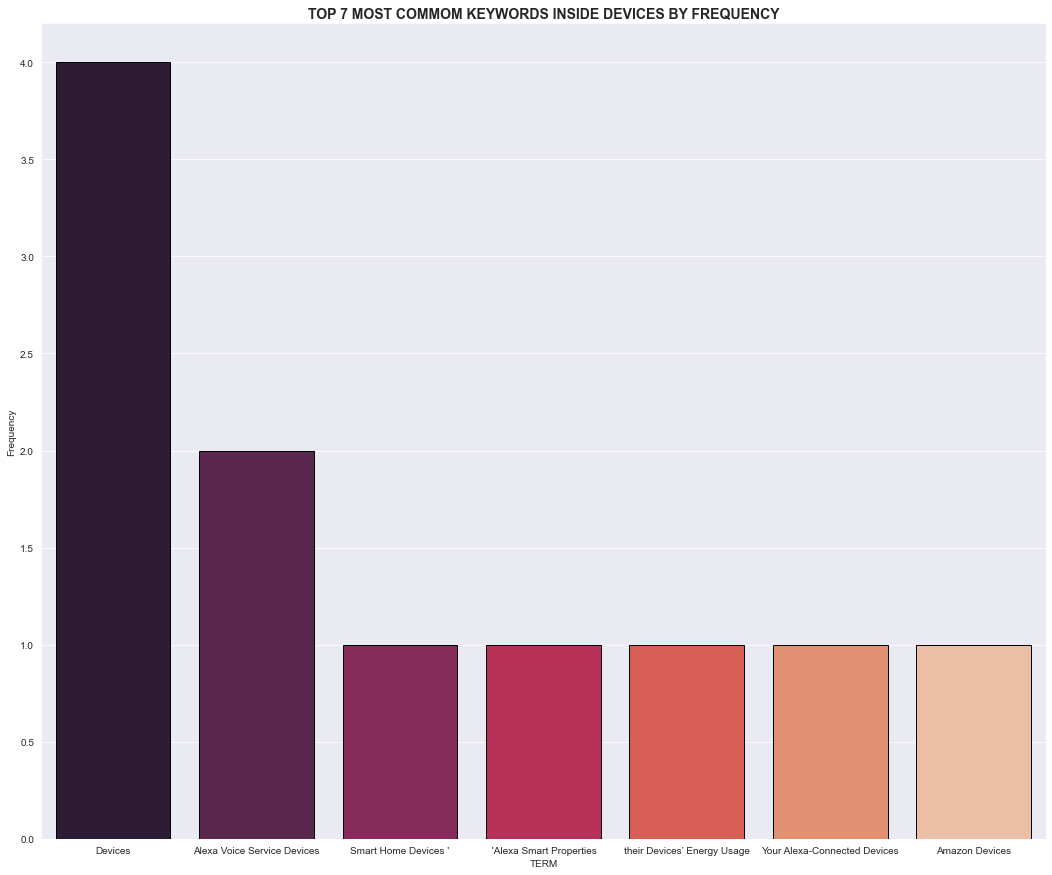

In [34]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff6[:7], 
    x=dff6.index[:7], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 7 MOST COMMOM KEYWORDS INSIDE DEVICES BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'sixth_most_commom_keyword.png'
)

In [35]:
orig_stdout = sys.stdout
f = open(
    'device.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Device' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [37]:
df7 = pd.read_table(
    'device.txt', 
    header=None,
    encoding= 'cp1252'
)
df7.rename(
    columns={
        0: 'Device'
    },
    inplace=True, 
    errors='raise'
)
dff7 = pd.DataFrame(
    data=df7.Device.value_counts()
).rename(
    columns={'Device': 'Frequency'}
).rename_axis(
    'Term'
)
dff7.head()

,Frequency
Term,
Devices,4
Device Makers,2
Alexa Voice Service Devices,2
Any Device,2
Smart Home Device Health Service,1


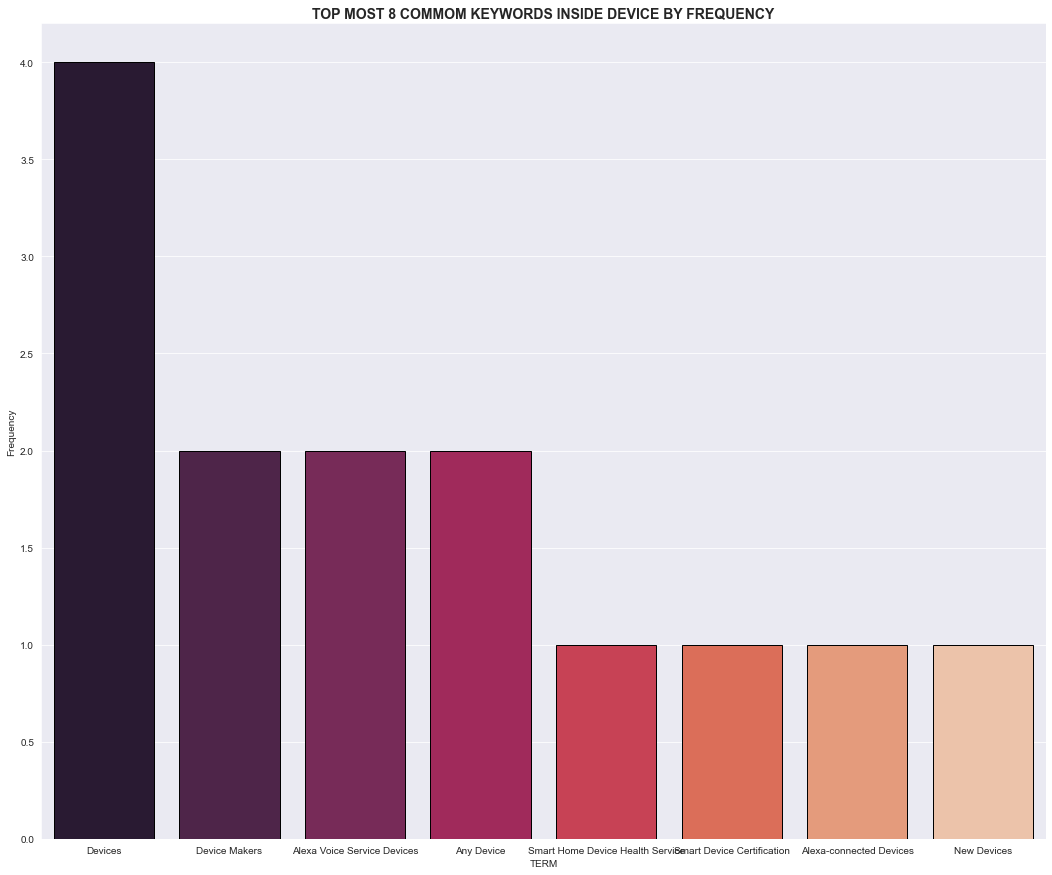

In [38]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff7[:8], 
    x=dff7.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP MOST 8 COMMOM KEYWORDS INSIDE DEVICE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'seventh_most_commom_keyword.png'
)

In [39]:

orig_stdout = sys.stdout
f = open(
    'service.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Service' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [40]:
df8 = pd.read_table(
    'service.txt', 
    header=None,
    encoding= 'cp1252'
)
df8.rename(
    columns={
        0: 'Service'
    },
    inplace=True, 
    errors='raise'
)
dff8 = pd.DataFrame(
    data=df8.Service.value_counts()
).rename(
    columns={'Service': 'Frequency'}
).rename_axis(
    'Term'
)
dff8.head()

,Frequency
Term,
Alexa Voice Service,8
Alexa Voice Service Devices,2
Smart Home Device Health Service,1
Expanded Self-Service Prototyping,1
Alexa Voice Service API',1


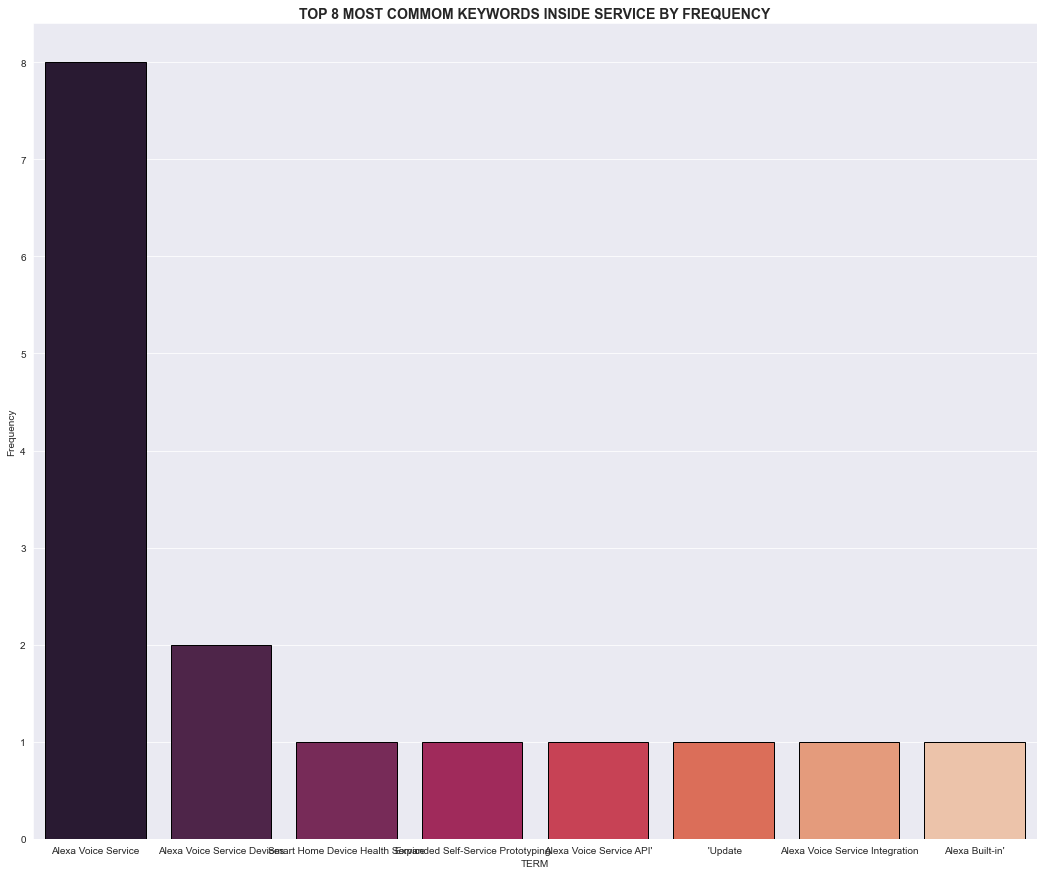

In [41]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff8[:8], 
    x=dff8.index[:8], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 8 MOST COMMOM KEYWORDS INSIDE SERVICE BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'eighth_most_commom_keyword.png'
)

In [42]:
orig_stdout = sys.stdout
f = open(
    'amazon.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Amazon' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [43]:
df9 = pd.read_table(
    'amazon.txt', 
    header=None
)
df9.rename(
    columns={
        0: 'Amazon'
    },
    inplace=True, 
    errors='raise'
)
dff9 = pd.DataFrame(
    data=df9.Amazon.value_counts()
).rename(
    columns={'Amazon': 'Frequency'}
).rename_axis(
    'Term'
)
dff9.head()

,Frequency
Term,
Amazon,6
'Amazon Builds,1
Amazon Sidewalk,1
Amazon Common Software,1
Amazon Device SDKs',1


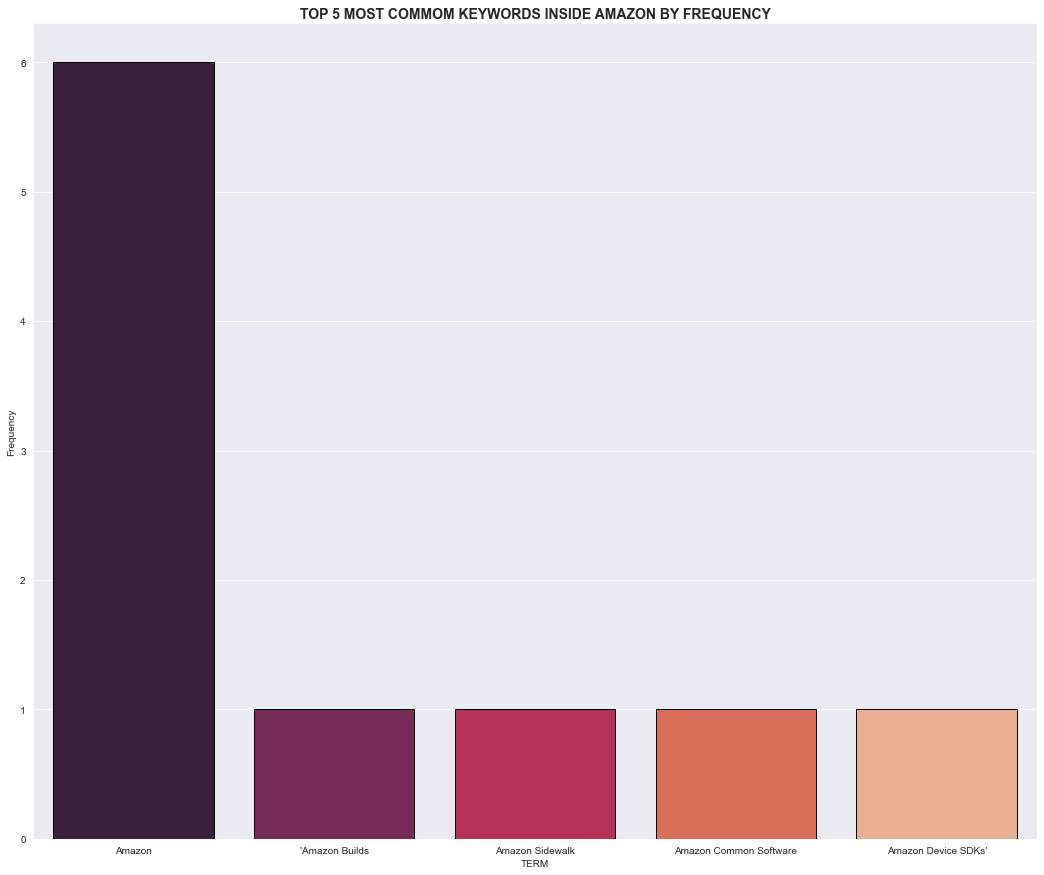

In [44]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff9[:5], 
    x=dff9.index[:5], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 5 MOST COMMOM KEYWORDS INSIDE AMAZON BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'nineth_most_commom_keyword.png'
)

In [45]:
orig_stdout = sys.stdout
f = open(
    'skills.txt', 'w'
)
sys.stdout = f


for token in doc:
    if 'Skills' in str(token):
        print(token)

sys.stdout = orig_stdout
f.close()

In [46]:
df10 = pd.read_table(
    'skills.txt', 
    header=None,
    encoding= 'cp1252'
)
df10.rename(
    columns={
        0: 'Skills'
    },
    inplace=True, 
    errors='raise'
)
dff10 = pd.DataFrame(
    data=df10.Skills.value_counts()
).rename(
    columns={'Skills': 'Frequency'}
).rename_axis(
    'Term'
)
dff10.head()

,Frequency
Term,
the Alexa Skills Kit,1
Your Skills,1
Multi-Capability Skills,1
Solution Providers',1
'Alexa Skills Kit,1


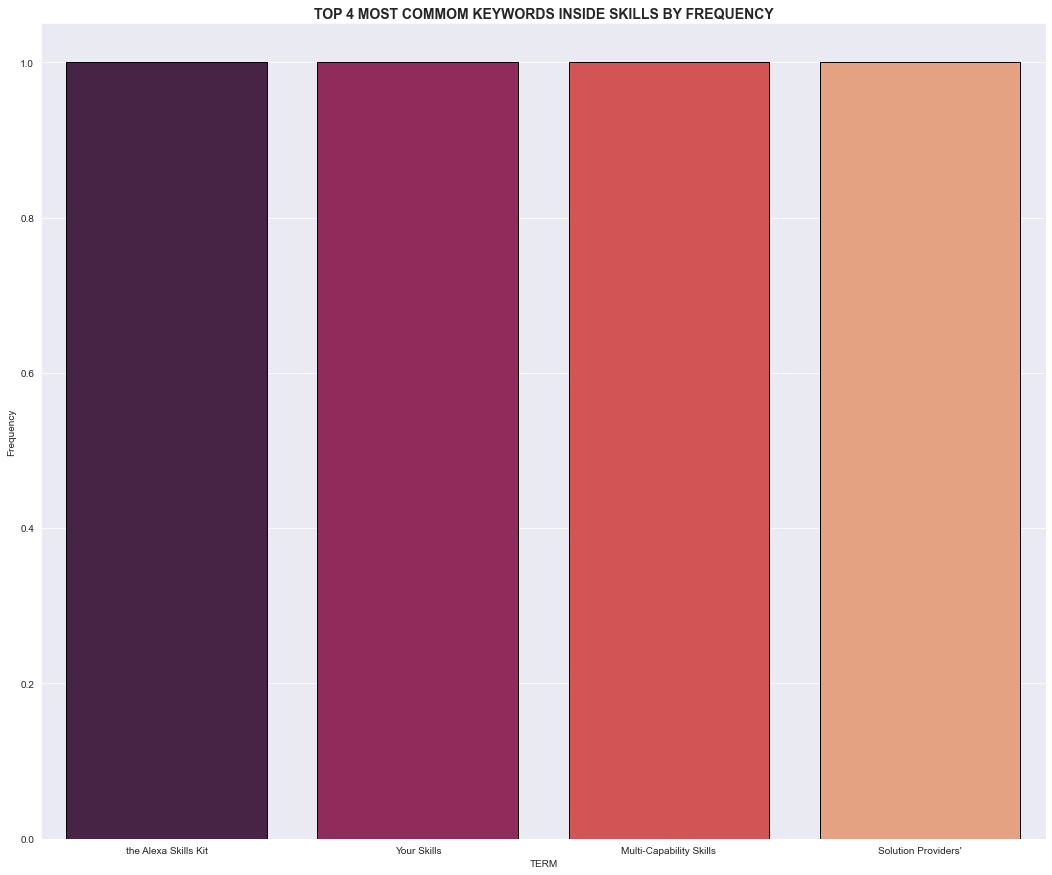

In [47]:
rcParams[
    'figure.figsize'
] = 18,15
ax = sns.barplot(
    data=dff10[:4], 
    x=dff10.index[:4], 
    y='Frequency', 
    palette='rocket', 
    edgecolor='k'
)
ax.set_title(
    'TOP 4 MOST COMMOM KEYWORDS INSIDE SKILLS BY FREQUENCY', 
    fontsize=14, 
    weight='bold'
)
ax.set_xlabel(
    'TERM'
)
plt.savefig(
    'tenth_most_commom_keyword.png'
)